# **Internet Marketing - an insight**

**Business benifits**

*   Targetting the right audience
*   Predicting who is most likely to click the advertisment

**Project Goal**
*   Internet Usage visualization based on age, gender and countries





**Feedback**
1. Ad Company - Click on Ad is the primary column
2. 

# Prepare the environment



In [2]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from scipy.stats import norm

from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)

import folium


# Read and Examine the dataset



In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [4]:
#Loading
Advertising_data  = pd.read_csv('/content/drive/My Drive//DataScience_Project/Advertising/advertising.csv')
Advertising_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
Advertising_data.shape

(1000, 10)

In [6]:
Advertising_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
Advertising_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Data Clean up








In [8]:
#internet usage based on timestamp
Advertising_data['Timestamp']=pd.to_datetime(Advertising_data['Timestamp'])
Advertising_data.dtypes
Advertising_data.set_index('Timestamp',inplace=True)
Advertising_data['Month_Name']=Advertising_data.index.strftime('%B')
Advertising_data['Day']=Advertising_data.index.strftime('%A')
#Advertising_data = Advertising_data.drop(['City'], axis=1)



In [9]:
Advertising_data.rename(columns = {'Male':'Gender'},inplace=True) 

In [10]:
#Advertising_data['Gender'] = df['Gender'].replace([0],'female')
#Advertising_data['Gender'] = df['Gender'].replace([1],'male')
Advertising_data["Gender"].replace({1: "male", 0: "female"}, inplace=True)

In [11]:
Advertising_data.head(20)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month_Name,Day
Timestamp,,,,,,,,,,,
2016-03-27 00:53:11,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,female,Tunisia,0,March,Sunday
2016-04-04 01:39:02,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,male,Nauru,0,April,Monday
2016-03-13 20:35:42,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,female,San Marino,0,March,Sunday
2016-01-10 02:31:19,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,male,Italy,0,January,Sunday
2016-06-03 03:36:18,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,female,Iceland,0,June,Friday
2016-05-19 14:30:17,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,male,Norway,0,May,Thursday
2016-01-28 20:59:32,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,female,Myanmar,0,January,Thursday
2016-03-07 01:40:15,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,male,Australia,1,March,Monday
2016-04-18 09:33:42,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,male,Grenada,0,April,Monday


# Analysis and visualization







In [22]:

# Creates pandas DataFrame. 
#df = pd.DataFrame(Advertising_data,(Advertising_data['Clicked on Ad'] =[1])) 

#Advertising_data.reset_index(inplace = True) 
#df = pd.DataFrame(Advertising_data, Advertising_data['Clicked on Ad'] = [1])

#Advertising_data['lifeExp_ind'] = np.where(Advertising_data.clicked on Ad = 1, True, False)
df = Advertising_data[(Advertising_data['Clicked on Ad'] == 1)] 
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month_Name,Day
Timestamp,,,,,,,,,,,
2016-03-07 01:40:15,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,male,Australia,1,March,Monday
2016-03-16 20:19:01,47.64,49,45632.51,122.02,Centralized neutral neural-net,West Brandonton,female,Qatar,1,March,Wednesday
2016-06-03 01:14:41,69.57,48,51636.92,113.12,Centralized content-based focus group,West Katiefurt,male,Egypt,1,June,Friday
2016-03-24 09:31:49,42.95,33,30976.00,143.56,Grass-roots coherent extranet,West William,female,Barbados,1,March,Thursday
2016-03-09 03:41:30,63.45,23,52182.23,140.64,Persistent demand-driven interface,New Travistown,male,Spain,1,March,Wednesday


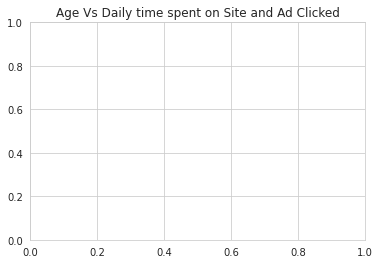

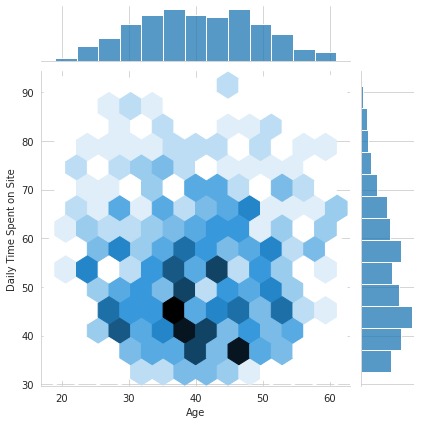

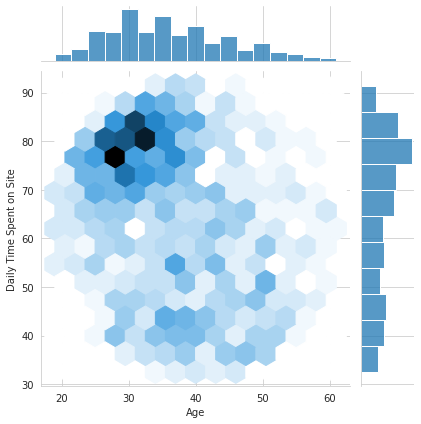

In [25]:
# Join Plot based  on age
#notes - Add a graph a Graph - for only clicked
#Remove graph2
#plt.figure(figsize=(12,3))
plt.title("Age Vs Daily time spent on Site and Ad Clicked")
sns.set_style("whitegrid");
sns.jointplot(x=df["Age"], y=df["Daily Time Spent on Site"], kind='hex')
sns.jointplot(x=Advertising_data["Age"], y=Advertising_data["Daily Time Spent on Site"], kind='hex')

In [27]:
df1= Advertising_data.groupby(["Day"]).median()
#df_country['Income'] = Advertising_data.groupby(["Area Income"]).mean()['Income']
# remove own index with default index 
df1.reset_index(inplace = True) 
df1.head(7)


,Day,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,Friday,68.370,34.0,59243.460,190.250,0.0
1,Monday,67.970,34.0,56155.040,180.620,1.0
2,Saturday,68.440,35.0,58107.165,170.360,1.0
3,Sunday,69.970,36.0,58287.860,194.440,1.0
4,Thursday,63.235,35.5,56315.635,178.235,1.0
5,Tuesday,70.125,34.5,56187.745,181.010,0.0
6,Wednesday,66.935,36.0,56494.310,174.560,1.0


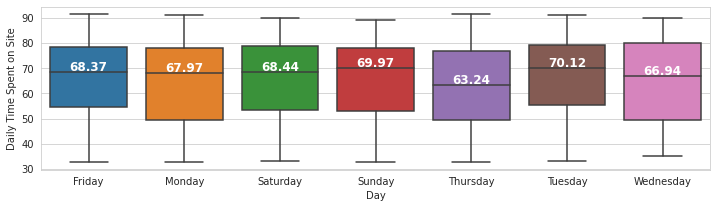

In [28]:
plt.figure(figsize=(12,3))
sns.set_style("whitegrid")
ax = sns.boxplot(x="Day", y="Daily Time Spent on Site", data=Advertising_data,order=[ 
                 'Friday', 'Monday', 'Saturday', 'Sunday','Thursday','Tuesday','Wednesday'])

medians = Advertising_data.groupby(['Day'])['Daily Time Spent on Site'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
#print(medians)
#print(median_labels)

pos = range(len(medians))

for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='x-small', color='w', weight='semibold',fontsize=12)

In [15]:
df = Advertising_data.groupby(['Day']).median()
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
Day,,,,,
Friday,68.370,34.0,59243.460,190.250,0.0
Monday,67.970,34.0,56155.040,180.620,1.0
Saturday,68.440,35.0,58107.165,170.360,1.0
Sunday,69.970,36.0,58287.860,194.440,1.0
Thursday,63.235,35.5,56315.635,178.235,1.0
Tuesday,70.125,34.5,56187.745,181.010,0.0
Wednesday,66.935,36.0,56494.310,174.560,1.0


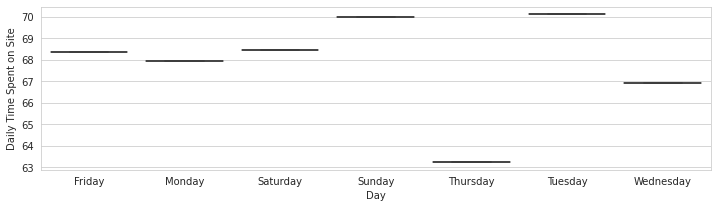

In [18]:
plt.figure(figsize=(12,3))
sns.set_style("whitegrid")
ax = sns.boxplot(x=df.index, y="Daily Time Spent on Site", data=df)

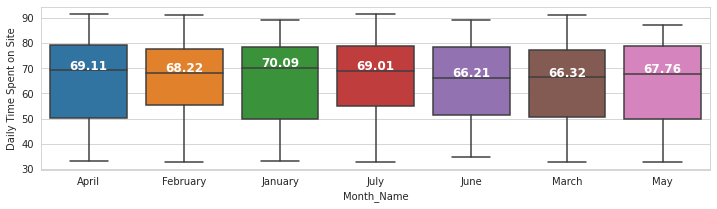

In [31]:
plt.figure(figsize=(12,3))
sns.set_style("whitegrid")
ax = sns.boxplot(x="Month_Name", y="Daily Time Spent on Site", data=Advertising_data,order=[ 
                 'April', 'February', 'January', 'July','June','March','May'])

medians = Advertising_data.groupby(['Month_Name'])['Daily Time Spent on Site'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='x-small', color='w', weight='semibold',fontsize=12)

In [30]:
Advertising_data.groupby(['Month_Name']).median()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
Month_Name,,,,,
April,69.110,36.0,57737.51,182.650,1.0
February,68.215,34.0,56649.62,175.010,1.0
January,70.090,35.0,58638.75,194.440,0.0
July,69.010,36.0,55195.61,195.070,0.0
June,66.205,35.0,55031.90,180.795,0.5
March,66.325,35.0,55967.86,181.655,0.0
May,67.760,34.0,58776.67,178.850,1.0


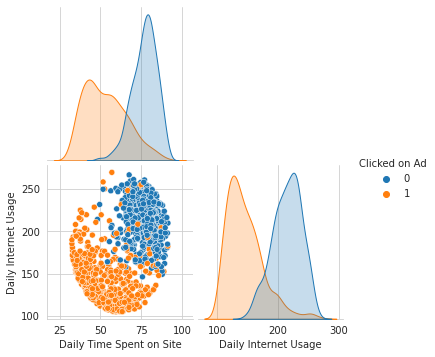

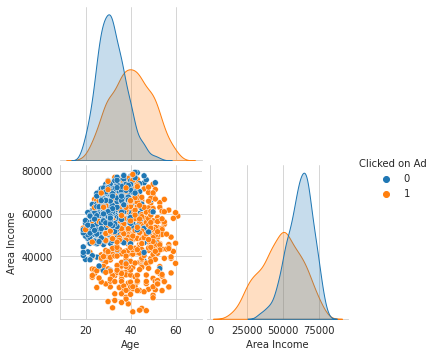

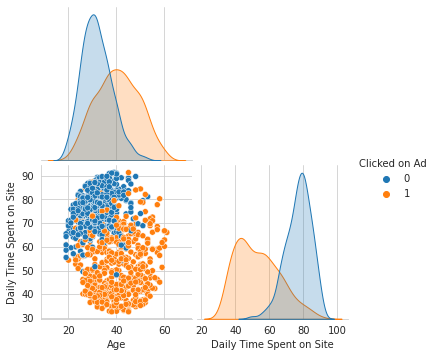

In [153]:
#notes - 
sns.pairplot(data=Advertising_data[['Daily Time Spent on Site','Daily Internet Usage','Clicked on Ad']], hue='Clicked on Ad', corner=True, )
sns.pairplot(data=Advertising_data[['Age','Area Income','Clicked on Ad']], hue='Clicked on Ad', corner=True, )
sns.pairplot(data=Advertising_data[['Age','Daily Time Spent on Site','Clicked on Ad']], hue='Clicked on Ad', corner=True, )


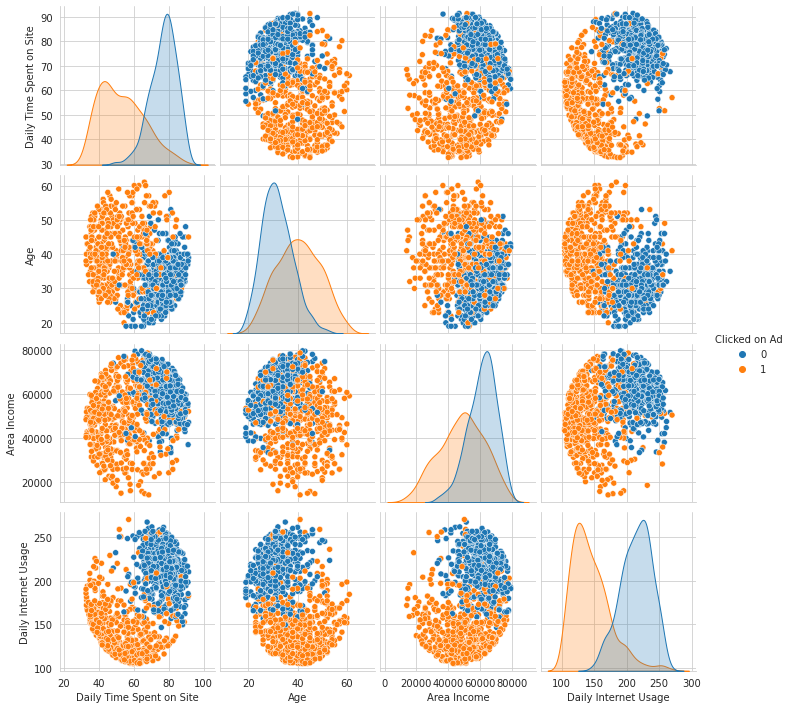

In [155]:
sns.pairplot(Advertising_data, hue="Clicked on Ad")

# Analysis the income of the countries







# Gender Visualization







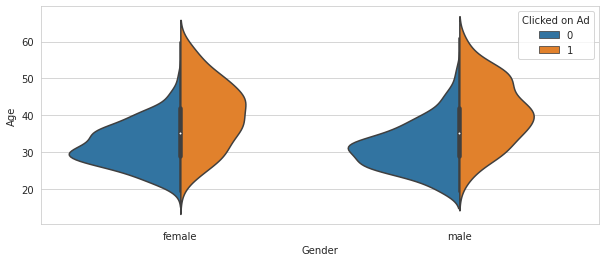

In [156]:
 #Violinplot Displays distribution of the Ad Click based on gender  
# across all levels of a category. 
# notes - check on based on Male and women ad clicked
plt.figure(figsize=(10,4))
sns.violinplot(x ="Gender", y ="Age", hue ="Clicked on Ad",  
data = Advertising_data, split = True) 

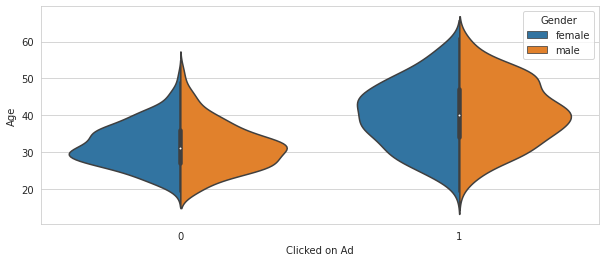

In [157]:
 #Violinplot Displays distribution of the Ad Click based on gender  
# across all levels of a category. 
# notes - check on based on Male and women ad clicked
plt.figure(figsize=(10,4))
sns.violinplot(x ="Clicked on Ad", y ="Age", hue ="Gender",  
data = Advertising_data, split = True) 

Text(0.5, 0, 'Age')

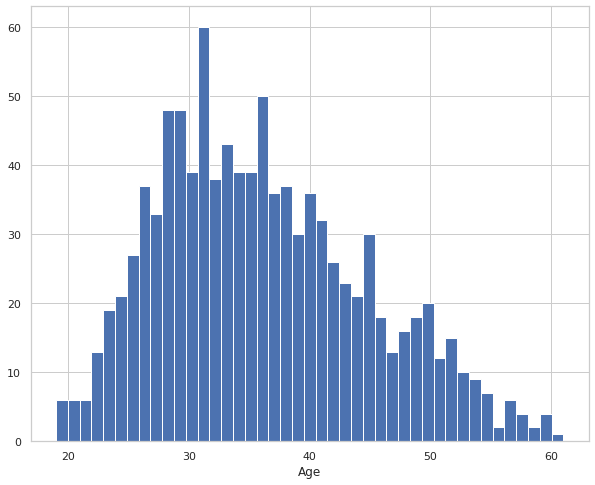

In [ ]:
#count of users based on age

plt.figure(figsize=(10, 8))
Advertising_data.Age.hist(bins=Advertising_data.Age.nunique())
plt.xlabel('Age')

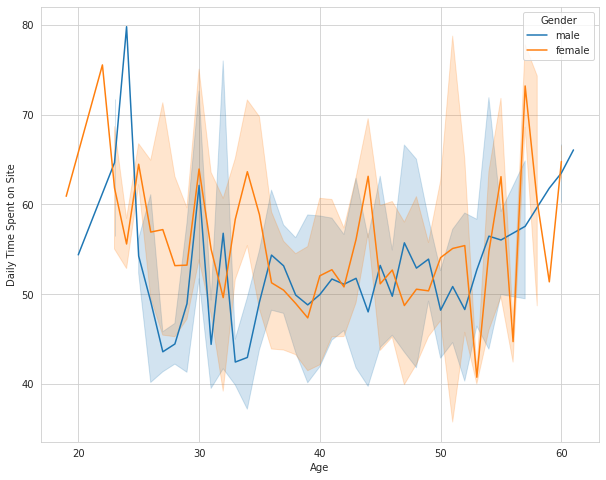

In [179]:

# Plot 2 linear fits for male and female.
plt.figure(figsize=(10, 8))
#sns.lmplot(y='Daily Time Spent on Site', x='Age', hue='Gender', data=df)
sns.lineplot(y='Daily Time Spent on Site', x='Age', hue='Gender', data=df)

In [44]:
df_country = Advertising_data.groupby(["Country"]).sum()
#df_country['Income'] = Advertising_data.groupby(["Area Income"]).mean()['Income']
# remove own index with default index 
df_country.reset_index(inplace = True) 
df_country.sort_values(by=['Area Income'],ascending=False)


,Country,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
70,France,570.88,337,508289.26,1478.08,5
54,Czech Republic,553.81,332,502481.83,1685.77,4
195,South Africa,476.70,324,462093.76,1396.79,6
137,Micronesia,474.61,305,449004.74,1491.18,4
230,Venezuela,459.06,234,447198.79,1176.26,3
...,...,...,...,...,...,...
110,Kiribati,36.37,40,47338.94,144.53,1
11,Aruba,86.41,28,45593.93,207.48,0
29,British Indian Ocean Territory (Chagos Archipe...,54.70,36,31087.54,118.39,1
77,Germany,82.12,52,28679.93,201.15,1


In [35]:
#Area Income Visualization based on country
country_geo = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'
hist_indicator = df_country.iloc[0]['Area Income']
# Setup a folium map at a high-level zoom
map = folium.Map(location=[100, 0], zoom_start=2)


my_map = folium.Map(tiles=None,min_zoom=6, max_zoom=12, zoom_start=6)
attribute = ('&copy GeoBasis-DE /<a href="http://www.bkg.bund.de">BKG</a>')

folium.raster_layers.WmsTileLayer(url = 'https://sgx.geodatenzentrum.de/wms_webatlasde.light_grau?',
                                  layers='webatlasde.light_grau',
                                  fmt='image/png',
                                  attr=attribute,
                                  transparent=False).add_to(my_map)

# choropleth maps bind Pandas Data Frames and json geometries.
#This allows us to quickly visualize data combinations
my_map.choropleth(geo_data=country_geo, data=df_country,
             columns=['Country', 'Area Income'],
             key_on='feature.properties.name',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=hist_indicator)
my_map    

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


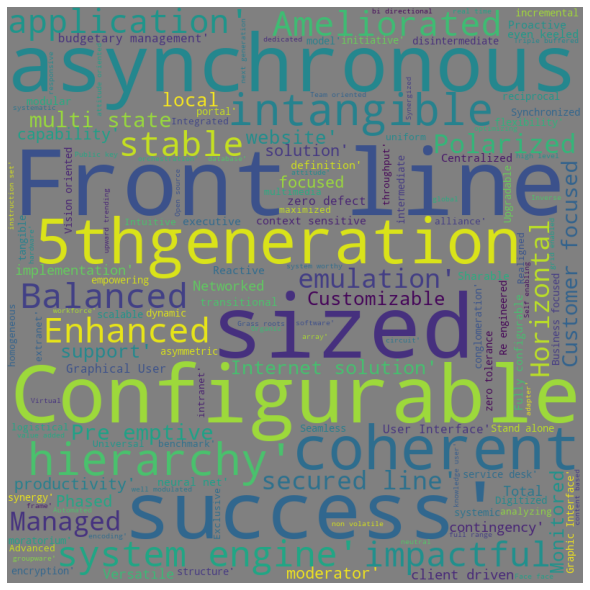

In [ ]:
text = Advertising_data['Ad Topic Line'].values 
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='grey', 
            stopwords = stopwords, 
            min_font_size = 10).generate(str(text)) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

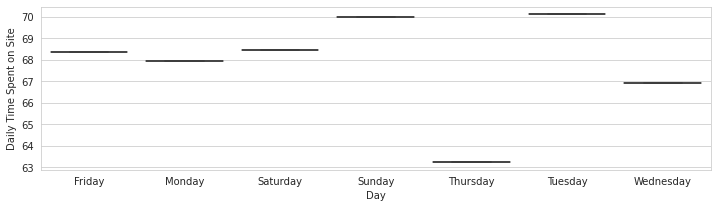

In [151]:
# Visulaising the daily time spent on site based on days
#note - Check on age and area income graph
#Check more on box plot - Median
# Calculate Median - Goup by day
plt.figure(figsize=(12,3))
#sns.boxplot(x="Day", y="Daily Time Spent on Site",data=df)
sns.boxplot(x="Day", y="Daily Time Spent on Site",data=df1)
#sns.boxplot(x="Day", y="Daily Time Spent on Site",data=Advertising_data)

In [ ]:
sns.countplot(x='Clicked on Ad', data= Advertising_data)
sns.despine(left=True, bottom=True)

In [ ]:
sns.jointplot(x=Advertising_data["Age"], y=Advertising_data["Daily Internet Usage"], kind='kde')